# A Huggett Economy with a Diffussion as Income Process
## Model
There is a unit measure of households. A household solves the following problem by choosing consumption $c_t$ and wealth $a_t$ given exogenous processes for the stochastic ideosyncratic income $y_t$ and the deterministic interest rate $r_t$:

$$\underset{c_{t},a_{t}}{\max} \, \mathbb{E}_0 \int_0^{\infty}e^{-\rho t} u\big(c_t\big) \, dt$$ subject to the deterministic law of motion for wealth
$$da_t = \big(y_t + r_t a_t - c_t\big) dt$$
and a borrowing limit
$$a_t \geq \underline{a}$$
and an initial level of wealth $a_0$.

The ideosyncratic income process evolves according to:
$$d y_t = µ(y_t)dt + σ(y_t)dW_t$$
with bounds $\underline{y}$ and $\bar{y}$.

Let $g(a, y)$ be the distribution of households over the wealth-income space. The Huggett economy is in an stationary equilibrium, i.e. $r_t = r \,\, \forall t$, if:
* households solve the above problem
* savings markets clear $B = \int_{-\infty}^{\infty} \int_\underline{a}^{-\infty} a\cdot g(a, y) \, da \, dy $, where $B$ is the net supply of bonds.

### Recursive Formulation with $r_t = r$
Let $\partial_{x} f(x)$ be the partial derivative of $f$ with respect to $x$. The HJB
$$\rho v(a, y) = \underset{c}{\max} \, u(c) + \partial_{a}v(a, y)\cdot(y + r a) + \partial_{y}v(a, y)\cdot\mu(y) + \frac{1}{2}\partial_{yy}v(a, y)\cdot\sigma^2(y)$$
and KFE
$$0=-\partial_{a}\Big(s(a, y) \cdot g(a,y)\Big) - \partial_{y} \Big(\mu(y) \cdot g(a,y)\Big) + \frac{1}{2}\partial_{yy} \Big(\sigma^2(y) \cdot g(a,y)\Big)$$
describe the household problem and the endogenouse distribution, where $s(a, y) = y + ra - c(a,y)$ and $c(a, y) = (u')^{-1}\big(\partial_{y} v(a, y)\big)$.

Boundary conditions are:
* $\partial_{a} v(\underline{a}, y) \geq u'\big(y + r\underline{a}\big)$, because saving must be weakly better than consuming at the borrowing limit
* $\partial_{y} v(a, \underline{y}) = 0$ and $\partial_{y} v(a, \bar{y}) = 0$, because of reflecting boundaries.

$$\rho v(a, y) = \frac{(\partial_{y} v(a, y))^{\frac{\gamma - 1}{\gamma}}} {1-\gamma} + \partial_{a}v(a, y)\cdot(y + r a) + \partial_{y}v(a, y)\cdot\mu(y) + \frac{1}{2}\partial_{yy}v(a, y)\cdot\sigma^2(y)$$

In [3]:
using DifferentialEquations

INFO: Precompiling module DifferentialEquations.


In [7]:
using DiffEqOperators, Plots
x = collect(-pi : 2pi/511 : pi);
u0 = -(x - 0.5).^2 + 1/12;
A = DerivativeOperator{Float64}(2,2,2pi/511,512,:Dirichlet,:Dirichlet;BC=(u0[1],u0[end]));

INFO: Precompiling module DiffEqOperators.


In [14]:
full(A)

512×512 Array{Float64,2}:
  87162.0   93776.2         87162.0   …   87162.0    87162.0    87162.0
 -87162.0      -1.00391e5  -80547.7      -87162.0   -87162.0   -87162.0
      0.0    6614.27       -13228.5           0.0        0.0        0.0
      0.0       0.0          6614.27          0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0   …       0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0   …       0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      0.0       0.0             0.0           0.0        0.0        0.0
      ⋮                               

  0.000287 seconds (136 allocations: 7.313 KiB)
  1.376445 seconds (6.93 M allocations: 568.348 MiB)



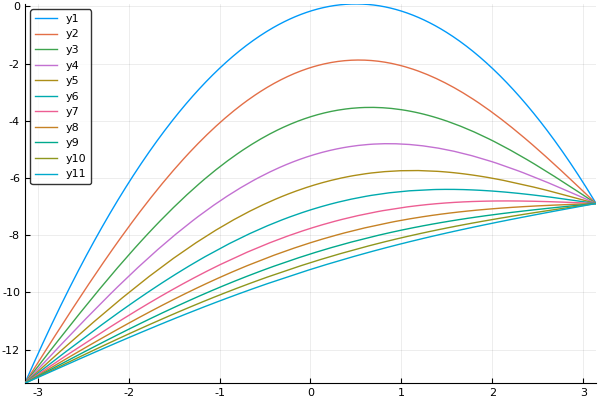

In [11]:
@time prob1 = ODEProblem(A, u0, (0.,10.));
@time sol1 = solve(prob1, dense=false, tstops=0:0.01:10);
# try to plot the solution at different time points using
plot(x, [sol1(i) for i in 0:1:10])